In [22]:
options(warn=-1)
library(ggplot2)
library(stats)
library(dplyr)
library(tidyverse)
library(rstatix)
library(ggpubr)
library(GGally)


In [23]:
df<-read.csv('lm_res.csv')

In [24]:
df %>% filter(subjectGuid=="BR1004")

X,subjectGuid,residual,responder,cohort.cohortGuid,Assay,Flu_Year
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
A/Guangdong-2020-2021.1,BR1004,-0.3611660,middle responder,BR1,A/Guangdong,2020-2021
Flu B/Phuket HA-2020-2021.1,BR1004,-0.4286451,middle responder,BR1,Flu B/Phuket HA,2020-2021
Flu B/Washington HA-2020-2021.1,BR1004,-1.1085165,low responder,BR1,Flu B/Washington HA,2020-2021


In [25]:
head(df)

,X,subjectGuid,residual,responder,cohort.cohortGuid,Assay,Flu_Year
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,A/Guangdong-2020-2021.1,BR1004,-0.3611660,middle responder,BR1,A/Guangdong,2020-2021
2,A/Guangdong-2020-2021.2,BR2009,-0.5396759,middle responder,BR2,A/Guangdong,2020-2021
3,A/Guangdong-2020-2021.3,BR1011,0.2182278,middle responder,BR1,A/Guangdong,2020-2021
4,A/Guangdong-2020-2021.4,BR1037,-0.3782780,middle responder,BR1,A/Guangdong,2020-2021
5,A/Guangdong-2020-2021.5,BR2025,1.3098246,high responder,BR2,A/Guangdong,2020-2021
6,A/Guangdong-2020-2021.6,BR1021,-0.5174366,middle responder,BR1,A/Guangdong,2020-2021


In [26]:
df$time_assay<-paste0(df$Flu_Year,'-',df$Assay)

In [27]:
df[c("subjectGuid","residual","time_assay")]

subjectGuid,residual,time_assay
<chr>,<dbl>,<chr>
BR1004,-0.3611660,2020-2021-A/Guangdong
BR2009,-0.5396759,2020-2021-A/Guangdong
BR1011,0.2182278,2020-2021-A/Guangdong
BR1037,-0.3782780,2020-2021-A/Guangdong
BR2025,1.3098246,2020-2021-A/Guangdong
BR1021,-0.5174366,2020-2021-A/Guangdong
BR2038,-0.4289293,2020-2021-A/Guangdong
BR1012,1.8457616,2020-2021-A/Guangdong
BR1031,-0.5230988,2020-2021-A/Guangdong


In [28]:
df_wide <- pivot_wider(df[c("subjectGuid","residual","time_assay")], 
                       names_from = time_assay, values_from = residual)
mat <- as.matrix(df_wide[,-1])
rownames(mat) <- df_wide[[1]]

In [30]:
mat<-as.data.frame(mat)

In [31]:
mat$cohort<-substr(rownames(mat),1,3)

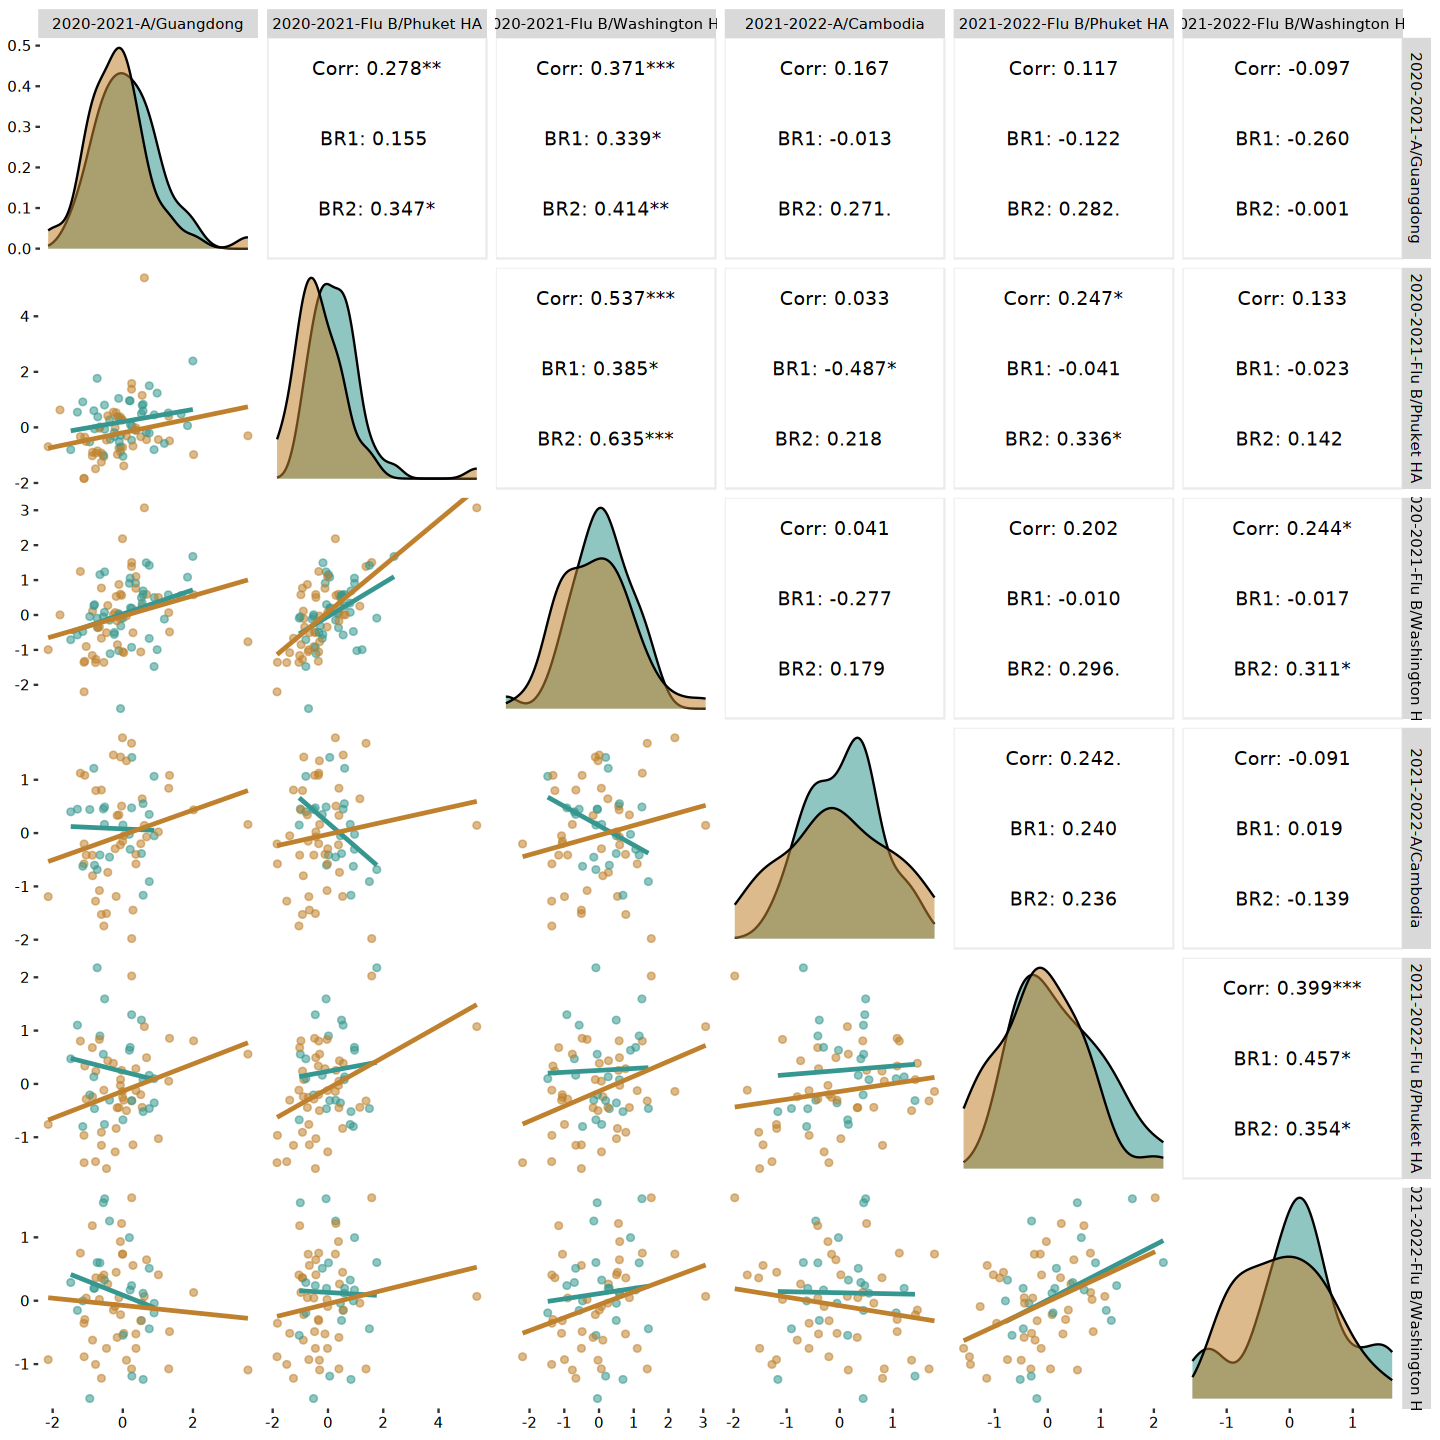

In [33]:
options(repr.plot.width = 12, repr.plot.height = 12)

ggpairs(as.data.frame(mat),                
        columns = 1:6,        
        aes(color = cohort, alpha = 0.5),
        upper = list(continuous = wrap("cor", method = "spearman", size = 4, color = "black")),
        lower = list(continuous = wrap("smooth", method = "lm", se = FALSE))) +
    scale_color_manual(values = c(BR2 = "#bf812d", BR1 = "#35978f")) +
    scale_fill_manual(values = c(BR2 = "#bf812d", BR1 = "#35978f")) +
    theme(strip.text = element_text(color = "black"),
          panel.grid = element_blank(),
          panel.background = element_rect(fill = "white"),
          axis.text = element_text(color = "black"))